In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jun  2 11:09:55 2018

@author: Marcelo
"""
import numpy as np
from scipy import (signal)
from speccwt_class import (SpecCwt)

from teste_datas import (Spec)
# from cwt_graph import (CwtGraph)

from sys import platform
from platform import node
from filebatch_class import (FileBatch)

# port (find_peaks, peak_widths, cwt, ricker, find_peaks_cwt)
from shann_entropy_func import (nonullelements_cwtmatr, cwt_norm)

from scipy.fftpack import (fft, ifft)
from scipy.stats import (entropy)
# from pathlib import Path, PurePath
import matplotlib.pyplot as plt
from scipy.optimize import (curve_fit, root)
from copy import deepcopy
# from numpy import cosh, zeros_like, mgrid, zeros
# from test_lists import seqmatch


In [2]:
def step1and2(spec, fn):
    if spec.readchnsp( fn ) >= 0:
        speccwt = SpecCwt()
        speccwt.setCounts(spec.spCounts)
        peaks = speccwt.find_peaks(spec.spCounts, 2, 3, 2.0)
        index_min_entro = -1
        if len(peaks) >= 35:
            speccwt.build_cwt_matrix( spec.spCounts, 1, 30 )
            print(fn)
            nonulle = nonullelements_cwtmatr(speccwt.cwtmatr)
            # print(nonulle.shape)
            cwtnorm = cwt_norm(nonulle)
            entro_spc = [entropy(scal) for scal in cwtnorm]
            print (entro_spc)
            index_min_entro = np.argmin(entro_spc)
            print(index_min_entro)
            plt.plot(entro_spc)
    return index_min_entro

In [3]:
def step1and2_IEC(spec, fn):
    if spec.readiecsp( fn ) >= 0:
        speccwt = SpecCwt()
        speccwt.setCounts(spec.spCounts)
        peaks = speccwt.find_peaks(spec.spCounts, 2, 3, 2.0)
        index_min_entro = -1
        if len(peaks) >= 35:
            speccwt.build_cwt_matrix( spec.spCounts, 1, 30 )
            print(fn)
            nonulle = nonullelements_cwtmatr(speccwt.cwtmatr)
            # print(nonulle.shape)
            cwtnorm = cwt_norm(nonulle)
            entro_spc = [entropy(scal) for scal in cwtnorm]
            print (entro_spc)
            index_min_entro = np.argmin(entro_spc)
            print(index_min_entro)
            plt.plot(entro_spc)
    return index_min_entro

C:/Users/Marcelo/wolkesicher/gamma/spectra/2018_EANNORM
Num de arquivos:        182 


 arquivos
C:\Users\Marcelo\wolkesicher\gamma\spectra\2018_EANNORM\lra05015.Chn
[5.249164412097294, 5.3197786469433295, 5.4866772671325545, 5.5902004629441935, 5.682587346450049, 5.782018691747753, 5.870344850110728, 5.957173164027932, 6.032346735779861, 6.092454128134774, 6.1394668136278945, 6.180965954382275, 6.235381287534805, 6.296671984202478, 6.359674790462388, 6.414134345010591, 6.452033049475085, 6.482590578284047, 6.506061035640762, 6.518505974627864, 6.5227780004188, 6.5204117897553795, 6.512856394865841, 6.501548776502844, 6.487371733543563, 6.4712231250570245, 6.454769698589219, 6.438215314878293, 6.42087153298521]
0
C:\Users\Marcelo\wolkesicher\gamma\spectra\2018_EANNORM\lra05115.Chn
[4.764204766015939, 5.004401469829982, 5.250531284021877, 5.367467275317401, 5.459764566425434, 5.568251353769645, 5.665336064996477, 5.737884415361244, 5.80652262556397, 5.862811006996184, 5.912114956151381,

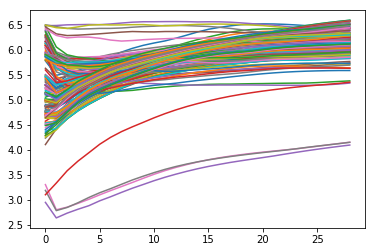

In [4]:
#################################################### P.P.

fb = FileBatch()
spec = Spec()

# 2017-08-15 Micro I...
# fb.slotSetBatchCHN('C:/Users/mmaduar/Filtros')
# 2017-08-15 ... ou meu note:
# fb.slotSetBatchCHN('C:/Users/Marcelo/Espectros/Filtros')

# 2018-nov-10
# 2018-nov-02 No meu note, mas agora para o EANNORM-2018
fb.slotSetBatchCHN(
        'C:/Users/Marcelo/wolkesicher/gamma/spectra/2018_EANNORM'
        )

# 2018-nov-07 No micro Ipen, mas agora para o EANNORM-2018
# fb.slotSetBatchCHN(
#        'C:/Users/mmaduar/wolkesicher/gamma/spectra/2018_EANNORM'
#        )

# print (fb.arqslist)
print (fb.numarqstxt + ' arquivos')

## totar = TOTal ARray
totar = np.zeros( (20,4096) ) 

list_min_entro = []
for fn in fb.lp:
    # print ( spec.spCounts )
    # Se espectro existe, ret = 0. Senao, -1 ou -2
    min_entro = step1and2(spec, fn)
    list_min_entro.append(min_entro)
print(list_min_entro)
# np.save('totar_2018_EANNORM', totar)
####

# Para plotar:
            # cwt_graf = CwtGraph( spec.cnts, speccwt.cwtmatr )
            # cwt_graf.plotcwtmatrix()

In [5]:
type(fb.numarqstxt)

str

In [6]:
list_min_entro.count(-1)

13

In [7]:
list_min_entro.count(0)

38

In [8]:
list_min_entro.count(1)

72

In [9]:
2*fb.numarqs

364

C:/Users/Marcelo/wolkesicher/gamma/spectra/2018_EANNORM
Num de arquivos:          7 


 arquivos
C:\Users\Marcelo\wolkesicher\gamma\spectra\2018_EANNORM\2016_Shell\lra16716.IEC
[6.578574127154859, 5.65991943028661, 5.584429710997442, 5.662880524573495, 5.755436302651229, 5.83250224520919, 5.885147851040511, 5.9412118696399565, 5.987400654024922, 6.03120244823855, 6.070985247504428, 6.113819336810407, 6.157590620669608, 6.19627702089025, 6.231027478707273, 6.264762909570183, 6.298232270553772, 6.330819061235053, 6.36317248136514, 6.3933507916694765, 6.423886857606837, 6.454210073134483, 6.482281080493468, 6.509577830210361, 6.535600951598142, 6.560032791012913, 6.582138323410957, 6.602075196570633, 6.621131377863293]
2
C:\Users\Marcelo\wolkesicher\gamma\spectra\2018_EANNORM\2016_Shell\lra16716_50k.IEC
[5.459607604352056, 5.148742830668227, 5.278986466809575, 5.453186834010147, 5.6024314276232055, 5.718898462271569, 5.790945949577225, 5.8601591216194455, 5.915727311499811, 5.965399979345

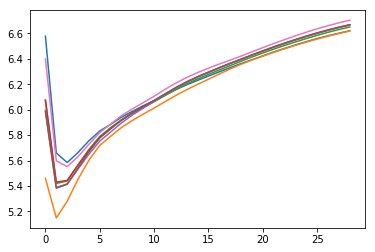

In [10]:
#################################################### P.P.

fb = FileBatch()
spec = Spec()

# 2017-08-15 Micro I...
# fb.slotSetBatchCHN('C:/Users/mmaduar/Filtros')
# 2017-08-15 ... ou meu note:
# fb.slotSetBatchCHN('C:/Users/Marcelo/Espectros/Filtros')

# 2018-nov-10
# 2018-nov-02 No meu note, mas agora para o EANNORM-2018
fb.slotSetBatchIEC(
        'C:/Users/Marcelo/wolkesicher/gamma/spectra/2018_EANNORM'
        )

# 2018-nov-07 No micro Ipen, mas agora para o EANNORM-2018
# fb.slotSetBatchCHN(
#        'C:/Users/mmaduar/wolkesicher/gamma/spectra/2018_EANNORM'
#        )

# print (fb.arqslist)
print (fb.numarqstxt + ' arquivos')

## totar = TOTal ARray
totar = np.zeros( (20,4096) ) 

list_min_entro = []
for fn in fb.lp:
    # print ( spec.spCounts )
    # Se espectro existe, ret = 0. Senao, -1 ou -2
    # step1(spec)
    min_entro = step1and2_IEC(spec, fn)
    list_min_entro.append(min_entro)
print(list_min_entro)
# np.save('totar_2018_EANNORM', totar)
####

# Para plotar:
            # cwt_graf = CwtGraph( spec.cnts, speccwt.cwtmatr )
            # cwt_graf.plotcwtmatrix()

In [11]:
fb.lp

['C:\\Users\\Marcelo\\wolkesicher\\gamma\\spectra\\2018_EANNORM\\2016_Shell\\lra16716.IEC',
 'C:\\Users\\Marcelo\\wolkesicher\\gamma\\spectra\\2018_EANNORM\\2016_Shell\\lra16716_50k.IEC',
 'C:\\Users\\Marcelo\\wolkesicher\\gamma\\spectra\\2018_EANNORM\\2016_Shell\\lra16816.IEC',
 'C:\\Users\\Marcelo\\wolkesicher\\gamma\\spectra\\2018_EANNORM\\2016_Shell\\lra16916.IEC',
 'C:\\Users\\Marcelo\\wolkesicher\\gamma\\spectra\\2018_EANNORM\\2016_Shell\\lra17016.IEC',
 'C:\\Users\\Marcelo\\wolkesicher\\gamma\\spectra\\2018_EANNORM\\2016_Shell\\lra17116.IEC',
 'C:\\Users\\Marcelo\\wolkesicher\\gamma\\spectra\\2018_EANNORM\\2016_Shell\\lra17216.IEC']

In [12]:
np.random.seed
i_random_spec = np.random.randint(fb.numarqs)
print(i_random_spec)
print(fb.lp[i_random_spec])

5
C:\Users\Marcelo\wolkesicher\gamma\spectra\2018_EANNORM\2016_Shell\lra17116.IEC


In [13]:
np.random.seed
i_random_spec = np.random.randint(fb.numarqs)
print(i_random_spec)
print(fb.lp[i_random_spec])
print(spec)

3
C:\Users\Marcelo\wolkesicher\gamma\spectra\2018_EANNORM\2016_Shell\lra16916.IEC


In [14]:
# no momento, fixei no i_random_spec = 3
i_random_spec = 3

C:\Users\Marcelo\wolkesicher\gamma\spectra\2018_EANNORM\2016_Shell\lra16916.IEC
[6.0750324744335, 5.430574056554885, 5.4435780960715725, 5.564131559148377, 5.681566065006777, 5.781925887820025, 5.850986505555626, 5.916940926427161, 5.9731400141860735]
1


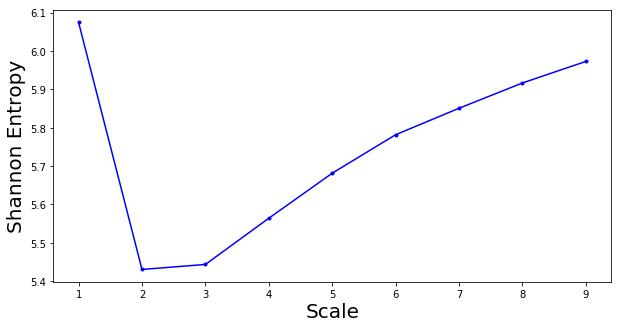

In [15]:
fn = fb.lp[i_random_spec]
if spec.readiecsp( fn ) >= 0:
    speccwt = SpecCwt()
    speccwt.setCounts(spec.spCounts)
    peaks = speccwt.find_peaks(spec.spCounts, 3, 4, 0.7)
    index_min_entro = -1
    if len(peaks) >= 35:
        speccwt.build_cwt_matrix( spec.spCounts, 1, 10 )
        print(fn)
        nonulle = nonullelements_cwtmatr(speccwt.cwtmatr)
        # print(nonulle.shape)
        cwtnorm = cwt_norm(nonulle)
        entro_spc = [entropy(scal) for scal in cwtnorm]
        print (entro_spc)
        index_min_entro = np.argmin(entro_spc)
        print(index_min_entro)
        x = np.arange(1, len(entro_spc)+1)
        fig1, ax1 = plt.subplots(1, 1, figsize=(10,5))
        ax1.plot(x, entro_spc, marker='.', color='blue')
#       ax1.set_xlim(0, 8100)
#       ax1.set_ylim(1, 1e4)
        ax1.set_xlabel('Scale', size=20)
        ax1.set_ylabel('Shannon Entropy', size=20)
        fig1.savefig('fig1.svg', transparent=True)
        fig1.savefig('fig1.png', transparent=True)

In [16]:
x = np.linspace(1, len(spec.spCounts), len(spec.spCounts))
print(x)
y = spec.spCounts

[1.000e+00 2.000e+00 3.000e+00 ... 8.194e+03 8.195e+03 8.196e+03]


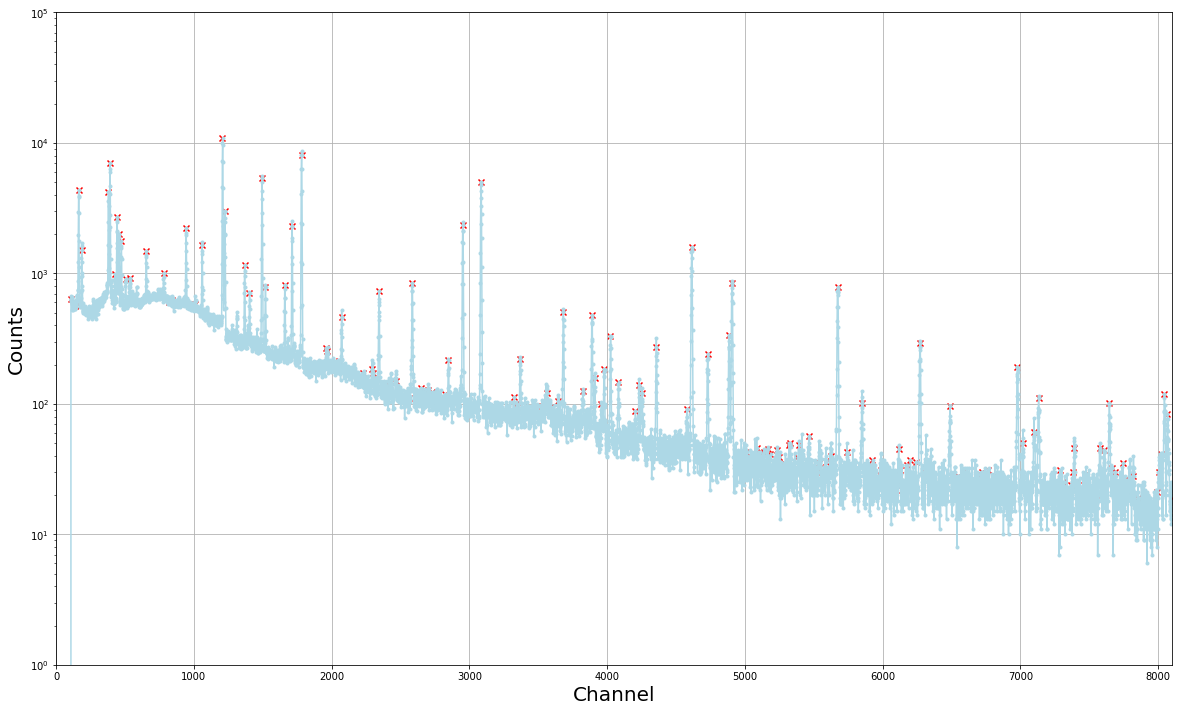

In [17]:
fig2, ax2 = plt.subplots(1, 1, figsize=(20,12))
ax2.semilogy(x, y, marker='.', color='lightblue')
ax2.scatter(peaks, [y[i] for i in peaks], marker='x', color='red')
ax2.grid(True)
ax2.set_xlim(0, 8100)
ax2.set_ylim(1, 1e5)
ax2.set_xlabel('Channel', size=20)
ax2.set_ylabel('Counts', size=20)
# ax5.text(2600, 300, 'Ra-226', color='green', rotation=30, size=16)
fig2.savefig('fig2.svg', transparent=True)
fig2.savefig('fig2.png', transparent=True)

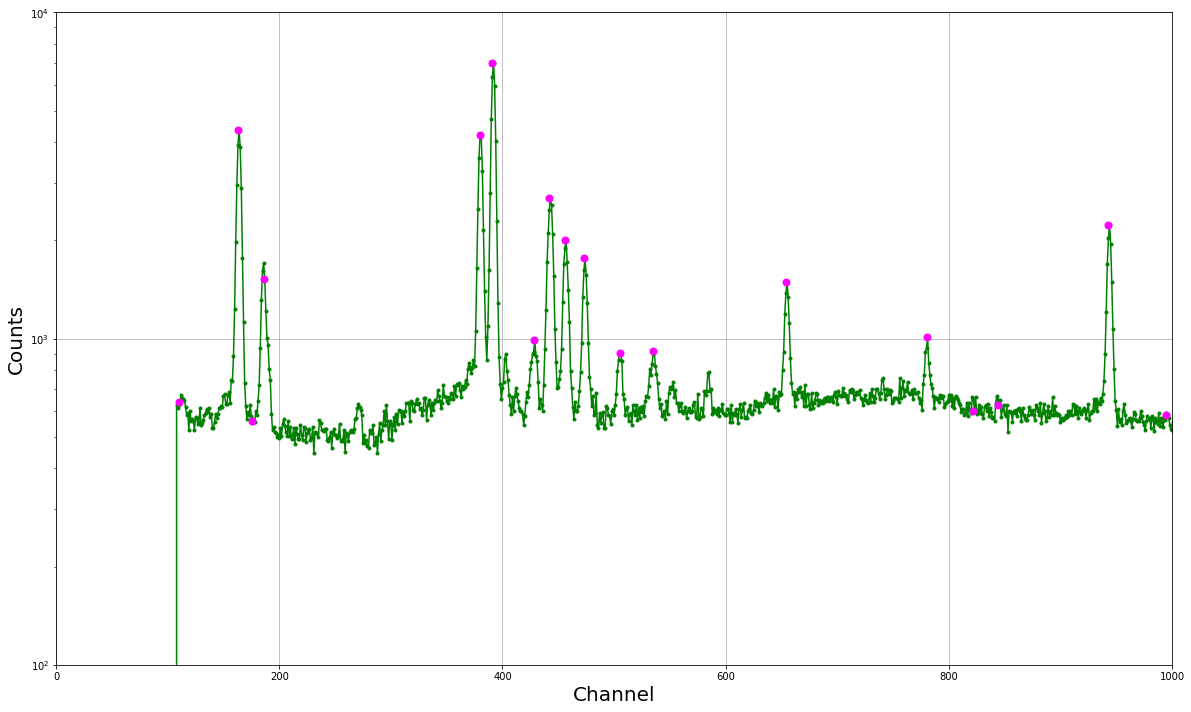

In [18]:
fig3, ax3 = plt.subplots(1, 1, figsize=(20,12))
ax3.semilogy(x, y, marker='.', color='green')
# ax1.scatter(peaks, [y[i] for i in peaks], marker='x', color='magenta')
ax3.semilogy(peaks, [y[i] for i in peaks], marker='o', color='magenta', markersize=7.0, linestyle='None')
ax3.grid(True)
ax3.set_xlim(0, 1000)
ax3.set_ylim(1e2, 1e4)
ax3.set_xlabel('Channel', size=20)
ax3.set_ylabel('Counts', size=20)
# ax5.text(2600, 300, 'Ra-226', color='green', rotation=30, size=16)
fig3.savefig('fig3.svg', transparent=True)
fig3.savefig('fig3.png', transparent=True)

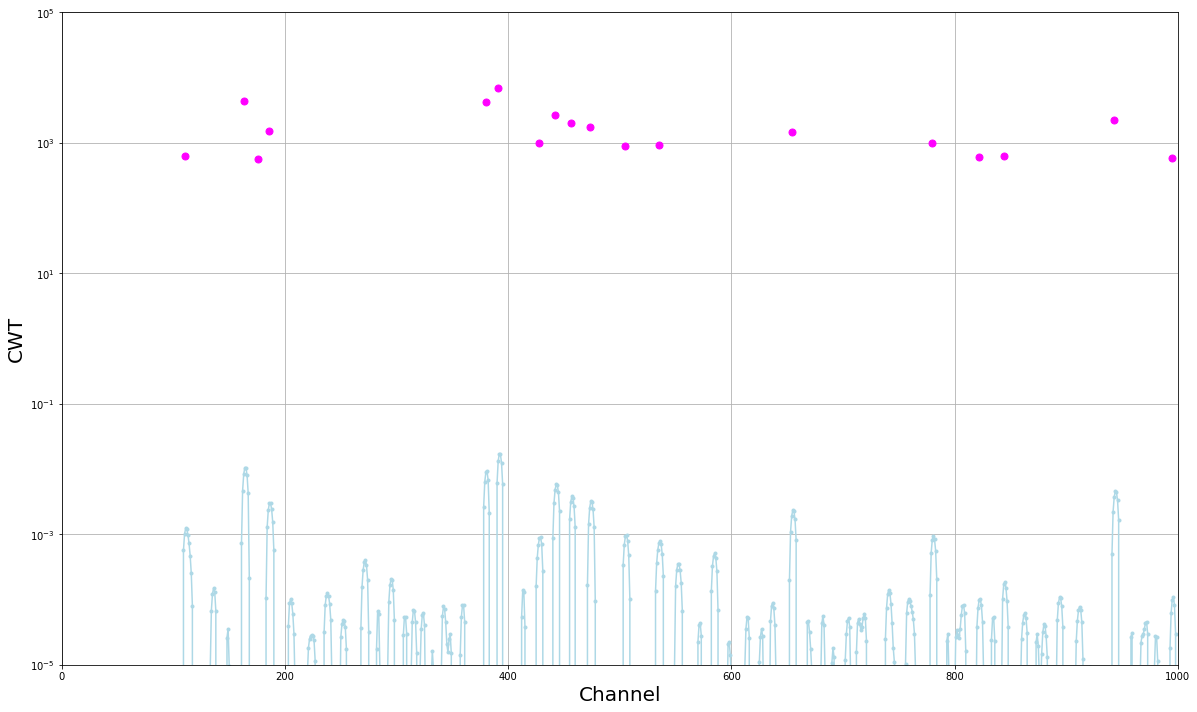

In [19]:
fig4, ax4 = plt.subplots(1, 1, figsize=(20,12))
# ax1.semilogy(x, y, marker='.', color='lightblue')
ax4.semilogy(x, cwtnorm[2], marker='.', color='lightblue')
ax4.semilogy(peaks, [y[i] for i in peaks], marker='o', color='magenta', markersize=7.0, linestyle='None')
ax4.grid(True)
ax4.set_xlim(0, 1000)
ax4.set_ylim(1e-5, 1e5)
ax4.set_xlabel('Channel', size=20)
ax4.set_ylabel('CWT', size=20)
# ax5.text(2600, 300, 'Ra-226', color='green', rotation=30, size=16)
fig4.savefig('fig4.svg', transparent=True)
fig4.savefig('fig4.png', transparent=True)

In [20]:
print(cwtnorm[2])

[1.29247019e-19 3.09512597e-19 3.53728683e-19 ... 2.28407637e-07
 0.00000000e+00 0.00000000e+00]
